In [2]:
from __future__ import division
import pandas as pd
import numpy as np
from sklearn import preprocessing, cross_validation, svm, metrics, tree, decomposition, svm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, OrthogonalMatchingPursuit, RandomizedLogisticRegression
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import ParameterGrid
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
import random
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy import optimize
import time
from sklearn.metrics import precision_recall_curve
import sklearn.metrics as metrics
import datetime
import heapq
import gen as gen
%matplotlib inline

In [3]:
# This reads in from world bank files
x, y = gen.go("../Example/resolved_joined.csv")

In [99]:
# This reads in from PA 3 files
def get_x_and_y(filename):
    '''
    Reads in from transformed csv file and generates X and Y arrays
    '''
    df = pd.read_csv(filename)
    Y = df['SeriousDlqin2yrs']
    df = df.drop('SeriousDlqin2yrs', 1)
    df = df.drop(df.columns[[0]], axis=1)
    return df, Y
# x, y = get_x_and_y("/Users/Emily/Desktop/Harris/ML 101/Assignments/ML-Programing-Assignments/PA-02/Output/conditional_transformed.csv")

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 2)

In [5]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1,

In [12]:
# clf = LogisticRegression()
clf = RandomForestClassifier()
#clf = ExtraTreesClassifier()
# clf = GradientBoostingClassifier()
# clf = AdaBoostClassifier()

In [13]:
y_predicted_probabilities = clf.fit(x, y).predict_proba(x_test)[:,1]

In [14]:
y_predicted_probabilities

array([ 0.2,  1. ,  1. ,  0.5,  1. ,  0.9,  1. ,  0.8,  1. ,  0.9,  0.4,
        0.1,  1. ,  0.9,  1. ,  0.3,  0.2,  1. ,  0.9,  1. ,  1. ,  1. ,
        1. ,  1. ,  0. ,  1. ,  0.2,  1. ,  0.5,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  0.9])

In [15]:
def plot_precision_recall_n(y_true, y_prob, model_name):
    '''
    Takes the model, plots precision and recall curves
    '''
    y_score = y_prob
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true, y_score)
    precision_curve = precision_curve[:-1]
    recall_curve = recall_curve[:-1]
    pct_above_per_thresh = []
    number_scored = len(y_score)
    for value in pr_thresholds:
        num_above_thresh = len(y_score[y_score >= value])
        pct_above_thresh = num_above_thresh / float(number_scored)
        pct_above_per_thresh.append(pct_above_thresh)
    pct_above_per_thresh = np.array(pct_above_per_thresh)
    plt.clf()
    fig, ax1 = plt.subplots()
    ax1.plot(pct_above_per_thresh, precision_curve, 'b')
    ax1.set_xlabel('percent of population')
    ax1.set_ylabel('precision', color='b')
    ax2 = ax1.twinx()
    ax2.plot(pct_above_per_thresh, recall_curve, 'r')
    ax2.set_ylabel('recall', color='r')

    name = str(model_name)
    plt.title(name)
    plt.show()
#     try:
#         plt.title(name)
# #         plt.savefig("Output/Images/{}.png".format(name))
#     except:
#         name = name[:15]
#         plt.title(name)
# #         plt.savefig("Output/Images/{}.png".format(name))
#     plt.close()

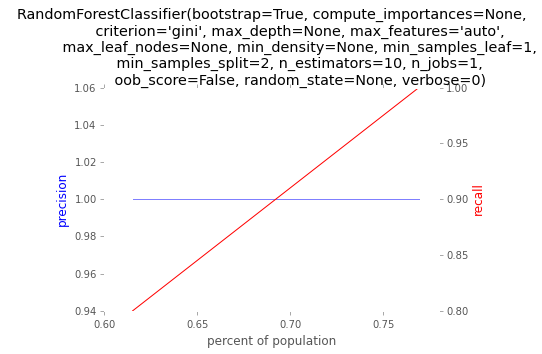

In [16]:
plot_precision_recall_n(y_test, y_predicted_probabilities, clf)